In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

n_grids = 350 # number of grid in grid search

with open('../Py_notebooks/static_results.pickle', 'rb') as handle:
    results = pickle.load(handle)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def assign_SOSD(decisions, verbose=0):
    if decisions == (0,0):
        if verbose:
            return "ID, r1=r2" # Indifference, r1=r2
        else:
            return "ID" 
        
    elif decisions == (0,1):
        return "ND" # Not Dominanting
    
    elif decisions == (1,0):
        return "SOSD"
    
    elif decisions == (1,1):
        if verbose:
            return "ID, crossing" #  Indifference, crossing
        else:
            return "ID" 
        
    else:
        return " "

In [4]:
SOSD = pd.read_pickle("SOSD_static.pickle")
SOSD

,"(unhedged, unhedged)","(future, future)","(Gaussian, Variance)","(Gaussian, VaR 99%)","(Gaussian, VaR 95%)","(Gaussian, ES 99%)","(Gaussian, ES 95%)","(Gaussian, Spectral 10)","(t_Copula_P, Variance)","(t_Copula_P, VaR 99%)",...,"(Gauss Mix Indep, VaR 95%)","(Gauss Mix Indep, ES 99%)","(Gauss Mix Indep, ES 95%)","(Gauss Mix Indep, Spectral 10)","(NIG Factor, Variance)","(NIG Factor, VaR 99%)","(NIG Factor, VaR 95%)","(NIG Factor, ES 99%)","(NIG Factor, ES 95%)","(NIG Factor, Spectral 10)"
"(unhedged, unhedged)",1001.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(future, future)",0.0,1001.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"(Gaussian, Variance)",0.0,0.0,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(Gaussian, VaR 99%)",0.0,0.0,0.0,1001.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(Gaussian, VaR 95%)",0.0,0.0,0.0,0.0,1001.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(Gaussian, ES 99%)",0.0,0.0,0.0,0.0,0.0,1001.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(Gaussian, ES 95%)",0.0,0.0,0.0,0.0,0.0,0.0,1001.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(Gaussian, Spectral 10)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1001.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(t_Copula_P, Variance)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1001.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(t_Copula_P, VaR 99%)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1001.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
SOSD_decisions = pd.DataFrame().reindex_like(SOSD)
# SOSD_decisions = pd.DataFrame(SOSD_decisions)

for i in range(len(SOSD)):
    for k in range(len(SOSD)):
        decisions = (SOSD.iloc[i,k], SOSD.iloc[k,i])
        SOSD_decisions.iloc[i,k] = assign_SOSD(decisions, verbose=0)

In [6]:
# SOSD_decisions.iloc[:6,:6]
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(SOSD_decisions)

,"(unhedged, unhedged)","(future, future)","(Gaussian, Variance)","(Gaussian, VaR 99%)","(Gaussian, VaR 95%)","(Gaussian, ES 99%)","(Gaussian, ES 95%)","(Gaussian, Spectral 10)","(t_Copula_P, Variance)","(t_Copula_P, VaR 99%)","(t_Copula_P, VaR 95%)","(t_Copula_P, ES 99%)","(t_Copula_P, ES 95%)","(t_Copula_P, Spectral 10)","(Clayton, Variance)","(Clayton, VaR 99%)","(Clayton, VaR 95%)","(Clayton, ES 99%)","(Clayton, ES 95%)","(Clayton, Spectral 10)","(Frank, Variance)","(Frank, VaR 99%)","(Frank, VaR 95%)","(Frank, ES 99%)","(Frank, ES 95%)","(Frank, Spectral 10)","(Gumbel, Variance)","(Gumbel, VaR 99%)","(Gumbel, VaR 95%)","(Gumbel, ES 99%)","(Gumbel, ES 95%)","(Gumbel, Spectral 10)","(Plackett, Variance)","(Plackett, VaR 99%)","(Plackett, VaR 95%)","(Plackett, ES 99%)","(Plackett, ES 95%)","(Plackett, Spectral 10)","(Gauss Mix Indep, Variance)","(Gauss Mix Indep, VaR 99%)","(Gauss Mix Indep, VaR 95%)","(Gauss Mix Indep, ES 99%)","(Gauss Mix Indep, ES 95%)","(Gauss Mix Indep, Spectral 10)","(NIG Factor, Variance)","(NIG Factor, VaR 99%)","(NIG Factor, VaR 95%)","(NIG Factor, ES 99%)","(NIG Factor, ES 95%)","(NIG Factor, Spectral 10)"
"(unhedged, unhedged)",,ID,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,ID,ID,SOSD,ID,ID,ID,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD
"(future, future)",ID,,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,ID,ID,SOSD,SOSD,ID,ID,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD,SOSD
"(Gaussian, Variance)",ND,ND,,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ND,ND,ID,ND,ND,ND,ID,SOSD,ID,SOSD,SOSD,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID
"(Gaussian, VaR 99%)",ND,ND,ID,,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ND,ND,ID,ND,ND,ND,ID,SOSD,ID,SOSD,SOSD,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID
"(Gaussian, VaR 95%)",ND,ND,ID,ID,,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ND,ND,ID,ND,ND,ND,ID,SOSD,ID,SOSD,SOSD,SOSD,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID
"(Gaussian, ES 99%)",ND,ND,ID,ID,ID,,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ND,ID,ID,ND,ND,ID,ND,ND,ND,ID,SOSD,ID,SOSD,SOSD,ID,ID,ID,ID,ID,ID,ID,ND,ID,ID,ND,ID,ID,ND,ID,ID,ID,ID,ID
"(Gaussian, ES 95%)",ND,ND,ID,ID,ID,ID,,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ND,ND,ID,ND,ND,ND,ID,SOSD,ID,SOSD,SOSD,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID
"(Gaussian, Spectral 10)",ND,ND,ID,ID,ID,ID,ID,,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ND,ND,ID,ND,ND,ND,ID,SOSD,ID,SOSD,SOSD,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID
"(t_Copula_P, Variance)",ND,ND,ID,ID,ID,ID,ID,ID,,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ND,ND,ID,ND,ND,ND,ID,SOSD,ID,SOSD,SOSD,SOSD,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID
"(t_Copula_P, VaR 99%)",ND,ND,ID,ID,ID,ID,ID,ID,ID,,ID,ID,ID,ID,ID,ID,ID,ND,ID,ID,ND,ND,ID,ND,ND,ND,ID,SOSD,ID,SOSD,SOSD,ID,ID,ID,ID,ID,ID,ID,ID,ID,ID,ND,ID,ID,ID,ID,ID,ID,ID,ID


In [7]:
list(SOSD_decisions.index)[34]

('Plackett', 'VaR 95%')

In [8]:
SOSD_decisions.iloc[34,:]

(unhedged, unhedged)                ND
(future, future)                    ND
(Gaussian, Variance)                ID
(Gaussian, VaR 99%)                 ID
(Gaussian, VaR 95%)                 ID
(Gaussian, ES 99%)                  ID
(Gaussian, ES 95%)                  ID
(Gaussian, Spectral 10)             ID
(t_Copula_P, Variance)              ID
(t_Copula_P, VaR 99%)               ID
(t_Copula_P, VaR 95%)               ID
(t_Copula_P, ES 99%)                ID
(t_Copula_P, ES 95%)                ID
(t_Copula_P, Spectral 10)           ID
(Clayton, Variance)                 ID
(Clayton, VaR 99%)                  ID
(Clayton, VaR 95%)                  ID
(Clayton, ES 99%)                   ID
(Clayton, ES 95%)                   ID
(Clayton, Spectral 10)              ID
(Frank, Variance)                   ND
(Frank, VaR 99%)                    ND
(Frank, VaR 95%)                    ID
(Frank, ES 99%)                     ND
(Frank, ES 95%)                     ND
(Frank, Spectral 10)     

0.8814504777240854 1.9083406045227278


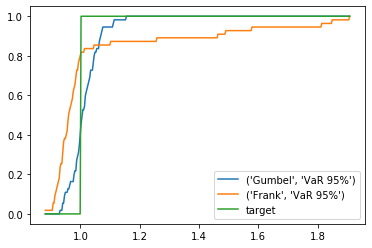

In [9]:
pair1 = "(Gumbel, VaR 95%)"
pair2 = "(Frank, VaR 95%)"

C1 = pair1[1:pair1.find(', ')]
R1 = pair1[pair1.find(', ')+2:-1]
pair1 = (C1, R1)

C2 = pair2[1:pair2.find(', ')]
R2 = pair2[pair2.find(', ')+2:-1]
pair2 = (C2, R2)

r1 = np.array(results[pair1])
r2 = np.array(results[pair2])

ecdf1 = ECDF(r1)
ecdf2 = ECDF(r2)
ecdf3 = ECDF(np.ones(len(r1)))

_min = np.min([np.min(r1), np.min(r2)]) # find a common support for two incomes
_max = np.max([np.max(r1), np.max(r2)])
x = np.linspace(_min, _max, n_grids) # grids
print(_min, _max)
plt.plot(x, ecdf1(x), label=pair1)
plt.plot(x, ecdf2(x), label=pair2)
plt.plot(x, ecdf3(x), label='target')

plt.legend()

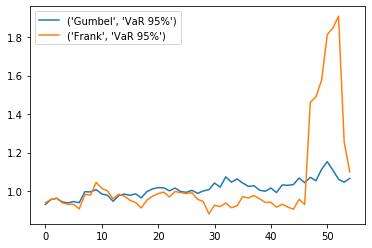

In [10]:
plt.plot(r1, label=pair1)
plt.plot(r2, label=pair2)
plt.legend()

In [11]:
# pair1 = "(Frank, VaR q=0.05)"
# pair1 = "(Gumbel, ES q=0.05)"
# pair1 = "(Frank, Variance)"
# pair1 = "(Gauss Mix Indep, VaR q=0.05)"
pair1 = "(Plackett, VaR q=0.05)"

C1 = pair1[1:pair1.find(', ')]
R1 = pair1[pair1.find(', ')+2:-1]
pair1 = (C1, R1)

r1 = np.array(results[pair1])
r2 = np.ones(len(r1))

ecdf1 = ECDF(r1)
ecdf2 = ECDF(r2)

_min = np.min([np.min(r1), np.min(r2)]) # find a common support for two incomes
_max = np.max([np.max(r1), np.max(r2)])
x = np.linspace(_min, _max, n_grids) # grids
print(_min, _max)
plt.plot(x, ecdf1(x), label=pair1)
plt.plot(x, ecdf2(x), label='target')
plt.legend()

KeyError: ('Plackett', 'VaR q=0.05')

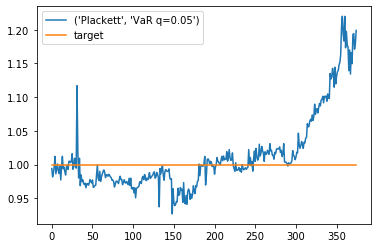

In [446]:
plt.plot(r1, label=pair1)
plt.plot(r2, label='target')
plt.legend()

In [447]:
48**2

2304

In [448]:
(1-(np.sum(np.sum(SOSD_decisions == ' '))-48)/(48**2-48)) *100 

99.95567375886525

In [12]:
print("Copula-risk-measure-pair dominates N other")
(SOSD_decisions == 'SOSD').sum(axis=1).sort_values(ascending=False)

Copula-risk-measure-pair dominates N other


(future, future)                  44
(unhedged, unhedged)              43
(Frank, ES 95%)                   41
(Frank, VaR 99%)                  40
(Frank, Spectral 10)              40
(Frank, Variance)                 36
(Frank, ES 99%)                   35
(Gauss Mix Indep, ES 99%)          8
(Clayton, ES 99%)                  6
(Gauss Mix Indep, Variance)        5
(NIG Factor, Variance)             5
(Gauss Mix Indep, VaR 99%)         4
(Gaussian, VaR 95%)                4
(Clayton, ES 95%)                  4
(Plackett, Variance)               4
(NIG Factor, Spectral 10)          4
(Gauss Mix Indep, ES 95%)          4
(NIG Factor, VaR 99%)              4
(NIG Factor, VaR 95%)              4
(t_Copula_P, VaR 95%)              4
(NIG Factor, ES 99%)               4
(t_Copula_P, Variance)             4
(NIG Factor, ES 95%)               4
(Gauss Mix Indep, Spectral 10)     3
(Gauss Mix Indep, VaR 95%)         3
(Plackett, Spectral 10)            3
(Plackett, ES 95%)                 3
(

0.9373320207988312 1.232313758935101


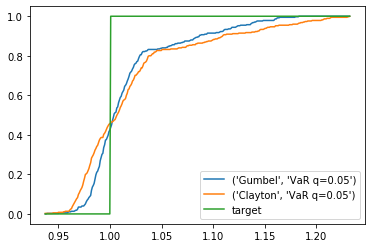

In [450]:
pair1 = "(Gumbel, VaR q=0.05)"
pair2 = "(Clayton, VaR q=0.05)"

C1 = pair1[1:pair1.find(', ')]
R1 = pair1[pair1.find(', ')+2:-1]
pair1 = (C1, R1)

C2 = pair2[1:pair2.find(', ')]
R2 = pair2[pair2.find(', ')+2:-1]
pair2 = (C2, R2)

r1 = np.array(results[pair1])
r2 = np.array(results[pair2])

ecdf1 = ECDF(r1)
ecdf2 = ECDF(r2)
ecdf3 = ECDF(np.ones(len(r1)))


_min = np.min([np.min(r1), np.min(r2)]) # find a common support for two incomes
_max = np.max([np.max(r1), np.max(r2)])
x = np.linspace(_min, _max, n_grids) # grids
print(_min, _max)
plt.plot(x, ecdf1(x), label=pair1)
plt.plot(x, ecdf2(x), label=pair2)
plt.plot(x, ecdf3(x), label='target')

plt.legend()

0.9337562749886458 1.1829614816933038


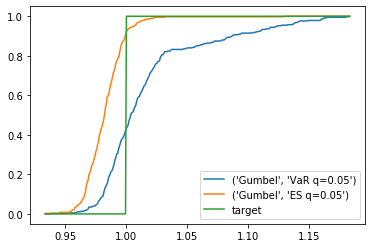

In [451]:
pair1 = "(Gumbel, VaR q=0.05)"
pair2 = "(Gumbel, ES q=0.05)"

C1 = pair1[1:pair1.find(', ')]
R1 = pair1[pair1.find(', ')+2:-1]
pair1 = (C1, R1)

C2 = pair2[1:pair2.find(', ')]
R2 = pair2[pair2.find(', ')+2:-1]
pair2 = (C2, R2)

r1 = np.array(results[pair1])
r2 = np.array(results[pair2])

ecdf1 = ECDF(r1)
ecdf2 = ECDF(r2)
ecdf3 = ECDF(np.ones(len(r1)))

_min = np.min([np.min(r1), np.min(r2)]) # find a common support for two incomes
_max = np.max([np.max(r1), np.max(r2)])
x = np.linspace(_min, _max, n_grids) # grids
print(_min, _max)
plt.plot(x, ecdf1(x), label=pair1)
plt.plot(x, ecdf2(x), label=pair2)
plt.plot(x, ecdf3(x), label='target')

plt.legend()

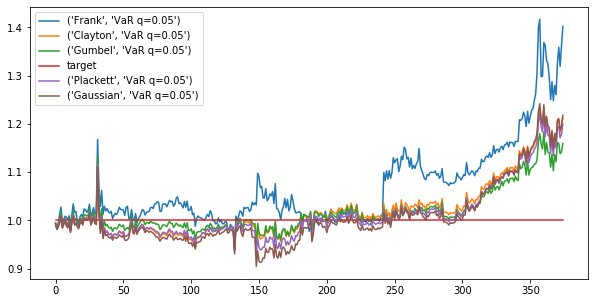

In [452]:
pairs = ["(Frank, VaR q=0.05)", 
         "(Clayton, VaR q=0.05)", 
         "(Gumbel, VaR q=0.05)", 
         'target', 
         "(Plackett, VaR q=0.05)",
         "(Gaussian, VaR q=0.05)"]
plt.figure(figsize=(10,5))
for pair in pairs:
    if pair == 'target':
        r1 = np.array(np.ones(len(r1)))
        plt.plot(r1, label=pair)
    else:
        C = pair[1:pair.find(', ')]
        R = pair[pair.find(', ')+2:-1]
        pair = (C, R)
        r1 = np.array(results[pair])
        plt.plot(r1, label=pair)
        
plt.legend()

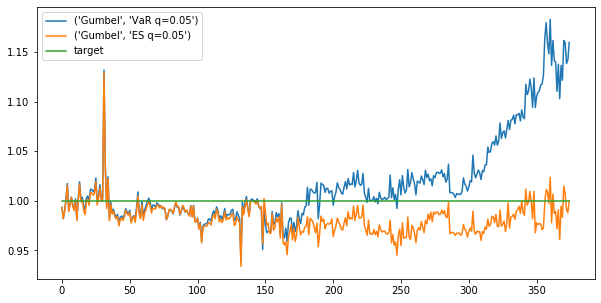

In [453]:
pairs = ["(Gumbel, VaR q=0.05)", 
         "(Gumbel, ES q=0.05)", 
#          "(Clayton, ERM k=10)", "(t_Copula, VaR q=0.05)",
         'target']
plt.figure(figsize=(10,5))
for pair in pairs:
    if pair == 'target':
        r1 = np.array(np.ones(len(r1)))
        plt.plot(r1, label=pair)
    else:
        C = pair[1:pair.find(', ')]
        R = pair[pair.find(', ')+2:-1]
        pair = (C, R)
        r1 = np.array(results[pair])
        plt.plot(r1, label=pair)
        
plt.legend()

In [58]:
target = np.array(np.ones(len(r1)))

In [93]:
MSE_arr = []

pairs = list(SOSD.index)

for pair in pairs:
    if pair == 'target':
        continue
    r1 = np.array(results[pair])
    MSE = np.sum((r1 - 1)**2)
    MSE_arr.append(MSE)

In [94]:
MSE = pd.Series(MSE_arr, index = pairs[:-1])
MSE.sort_values(ascending=True)

(Gumbel, ES q=0.05)               0.206201
(Gumbel, ERM k=10)                0.253008
(Clayton, Variance)               0.648642
(Gaussian, Variance)              0.708498
(Gaussian, VaR q=0.01)            0.716676
(Gauss Mix Indep, VaR q=0.05)     0.736040
(Gaussian, ES q=0.05)             0.772034
(Gumbel, Variance)                0.799405
(Gumbel, VaR q=0.01)              0.800275
(Gaussian, ERM k=10)              0.835779
(Gumbel, VaR q=0.05)              0.852187
(Plackett, ERM k=10)              0.873723
(Gauss Mix Indep, ERM k=10)       0.882525
(t_Copula, Variance)              0.885277
(Plackett, Variance)              0.977081
(t_Copula, ERM k=10)              0.979988
(Plackett, ES q=0.05)             1.083027
(Gumbel, ES q=0.01)               1.115201
(Clayton, ERM k=10)               1.174207
(NIG_factor, ERM k=10)            1.240646
(t_Copula, VaR q=0.05)            1.245813
(t_Copula, ES q=0.05)             1.254049
(Plackett, VaR q=0.05)            1.286823
(Clayton, V

In [83]:
TV_arr = []

pairs = list(SOSD.index)

for pair in pairs:
    if pair == 'target':
        continue
    r1 = np.array(results[pair])
    TV = np.sum((r1 - target))
    TV_arr.append(TV)

In [88]:
TV = pd.Series(TV_arr, index = pairs[:-1])
TV.sort_values(ascending=True)

(Gauss Mix Indep, ES q=0.01)    -68.435985
(NIG_factor, ES q=0.01)         -59.120339
(Gauss Mix Indep, VaR q=0.01)   -55.546952
(NIG_factor, VaR q=0.01)        -37.998355
(t_Copula, ES q=0.01)           -36.603245
(Plackett, ES q=0.01)           -34.732145
(Frank, ES q=0.01)              -29.588135
(t_Copula, VaR q=0.01)          -28.055274
(Gaussian, ES q=0.01)           -25.408896
(Clayton, ES q=0.01)            -24.278764
(Plackett, VaR q=0.01)          -23.819614
(Clayton, VaR q=0.01)           -22.305583
(Gauss Mix Indep, ES q=0.05)    -19.811275
(NIG_factor, ES q=0.05)         -19.501540
(Gumbel, ES q=0.01)             -18.000265
(t_Copula, ES q=0.05)           -17.049726
(Frank, VaR q=0.01)             -16.859780
(Frank, ERM k=10)               -14.398389
(Plackett, ES q=0.05)           -13.972323
(Frank, Variance)               -12.938895
(Gumbel, VaR q=0.01)            -12.561080
(t_Copula, ERM k=10)            -11.034041
(Gaussian, ES q=0.05)           -10.782773
(Frank, ES 

In [ ]:
# Static: _mathematica/data_PL/ 55 (last is label 54) files for each each pair; use out sample
# Terminal PnL for each csv seperately; sum of returns, apply exp d = AppendTo[d, Exp[Total[d1[[2 ;;, 2 ;;]]]]]
# with one euro starting

# Dynamic _mathematica/data_PL_5Days/ concatenate into one series, look for SD